In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential # Used to combine layers, so we can stack Dense layers inside this
from tensorflow.keras.layers import Dense # Used to create fully connected layers, this is the architecture for the layer itself

In [4]:
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit

In [5]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


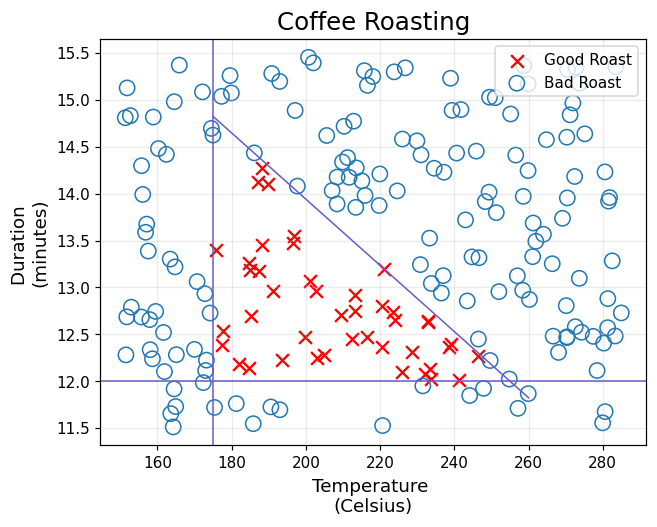

In [6]:
plt_roast(X,Y)

<h4> Normalise the data so that we do not have exceeding large values that will skew the results

In [7]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}") # Unscaled data
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}") # Unscaled data
norm_l = tf.keras.layers.Normalization(axis=-1) # Creates a layer in the network that only normalizes its inputs with the z-normalisation: xn = (x - mu) / sigma, done for each feature (row)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X) # Applies the normalization to X
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [8]:
# Make copyes of data to form a larger training set
Xt = np.tile(Xn,(1000,1)) # Multiply 1000 times the data in Xn
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


<h4> Building the model itself

In [10]:
# Set random seed for reproducibility
tf.random.set_seed(1234)

# Define a simple two-layer neural network
model = Sequential([
    tf.keras.Input(shape=(2,)),               # Input layer: 2 features (temperature, duration)
    Dense(3, activation='sigmoid', name='L1'), # Hidden layer: 3 neurons, sigmoid activation
    Dense(1, activation='sigmoid', name='L2')  # Output layer: 1 neuron, sigmoid for binary classification
])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Layer 1: 
## Inputs: 2 (temperature, duration)
## Neurons: 3
## Parameters: (2 + 1) * 3 = 9 (weights + biases)

# Layer 2:
## Inputs: 3 (from previous layer)
## Neurons: 1
## Parameters: (3 + 1) * 1 = 4 (weights + biases) [there are 3 inputs from the previous layer, which makes the weights 3 and the once bias term that shifts the activation curve]

In [14]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.11901772  0.8371569   0.9804425 ]
 [ 0.70769954 -0.78011227  0.82101345]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.20701015]
 [-0.74863315]
 [ 0.12973058]] 
b2(1,): [0.]


In [15]:
# Compiling the model by telling keras how to train, ie what to min (loss function -> BinaryCrossEntropy) and what method to use to min it (optimizer -> Adam)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 486us/step - loss: 0.2242
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 497us/step - loss: 0.1067
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 514us/step - loss: 0.0265
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 532us/step - loss: 0.0140
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 524us/step - loss: 0.0094
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 546us/step - loss: 0.0067
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 472us/step - loss: 0.0048
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 463us/step - loss: 0.0034
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step - loss: 0.0025
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 541us/step - loss: 0.0018


In [16]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-10.868858    -0.08972728  15.069137  ]
 [ -0.21088938  -9.179036    12.578101  ]] 
b1: [-11.834917  -11.465831    2.0194929]
W2:
 [[-50.441734]
 [-47.012783]
 [-41.758373]] 
b2: [26.930431]


In [18]:
# After finishing the lab later, you can re-run all 
# cells except this one to see if your trained model
# gets the same results.

# Set weights from a previous run. 
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

# Replace the weights from your trained model with
# the values above.
model.get_layer("L1").set_weights([W1,b1])
model.get_layer("L2").set_weights([W2,b2])

In [19]:
# Check if the weights are successfully replaced
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.28  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


<h4> Making Predictions

In [20]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
predictions = 
 [[9.625127e-01]
 [3.031606e-08]]


In [22]:
# Making a threshold 
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

# Applying the model to all possible combinations of temperature 
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]
decisions = 
[[1]
 [0]]


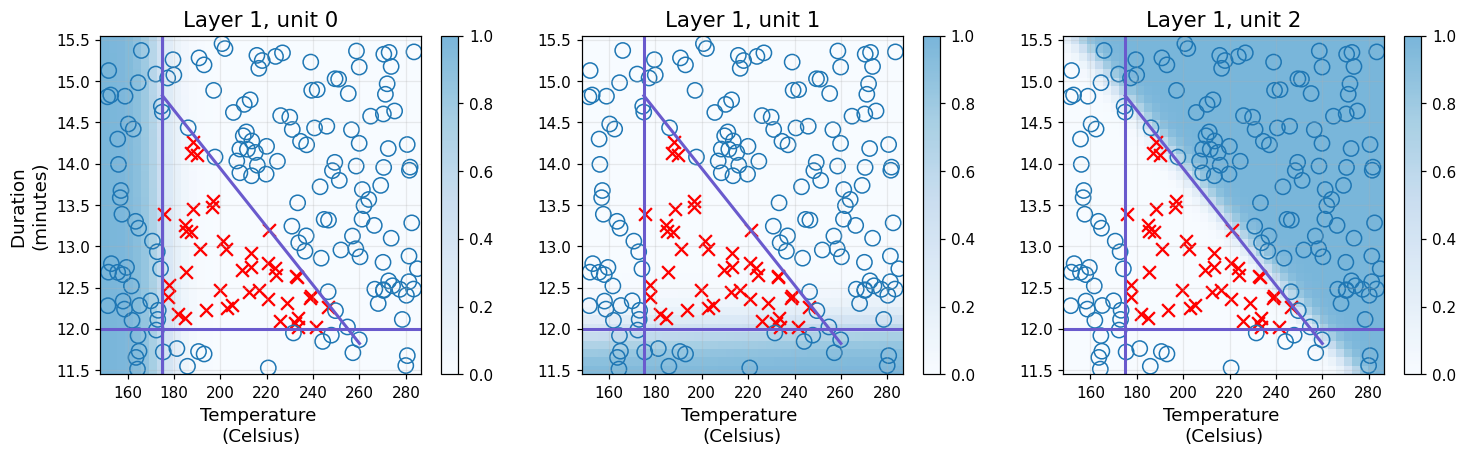

In [23]:
# We can plot the results of the first layers, where we can see that each of the neurons worked on different bad regions
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

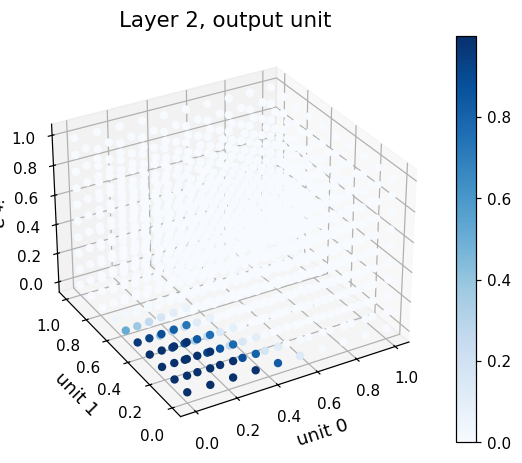

In [24]:
plt_output_unit(W2,b2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

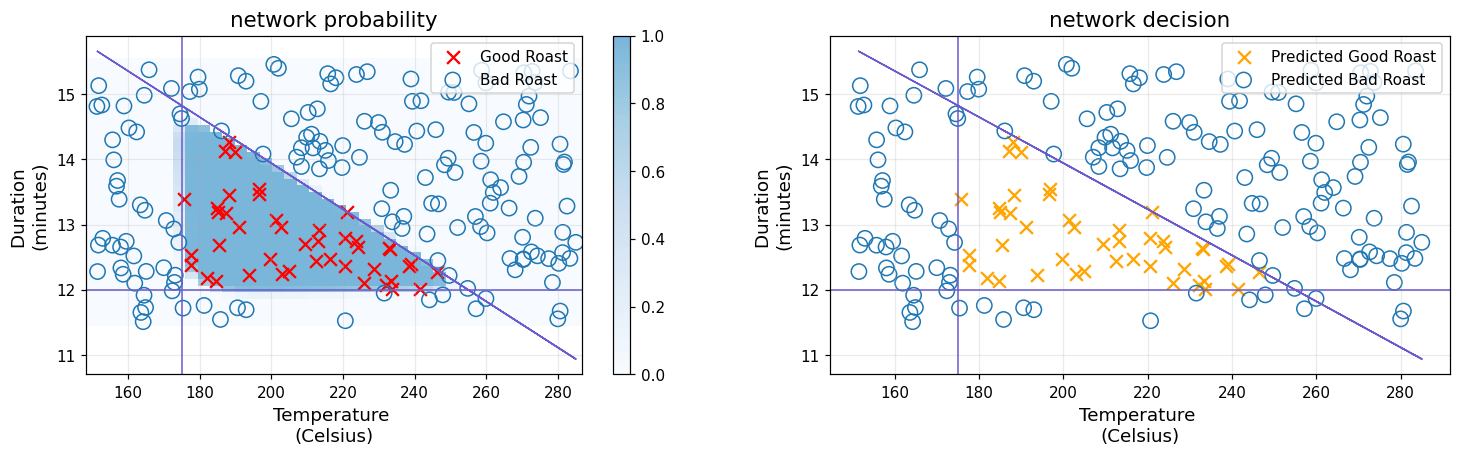

In [25]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)